## PCA

### Eigenvector Eigenvalues

In [2]:
import numpy as np
import numpy.linalg as linalg


P = np.array([[3, 0, 1], [-4, 1, 2], [-6, 0, -2]])

D, V = linalg.eig(P)


print(D)

print(V)

[[ 0.00000000e+00  5.55111512e-17 -9.53462589e-02]
 [ 1.00000000e+00 -1.00000000e+00 -9.53462589e-01]
 [ 0.00000000e+00 -1.11022302e-16  2.86038777e-01]]


In [19]:
arr=[[2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1],[2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]]

In [20]:
x=[.69,-1.31,.39,.09,1.29,.49,.19,-.81,-.31,-.71]
y=[.49,-1.21,.99,.29,1.09,.79,-.31,-.81,-.31,-1.01]

In [21]:
arr=np.array([x,y])

In [22]:
Adjusted_data=np.asarray(arr)

In [23]:
Eigenvector1=[[-.67],[-.73]]

In [24]:
Eigenvector1=np.asarray(Eigenvector1)

In [25]:
Final_Data1=np.matmul(np.transpose(Eigenvector1),Adjusted_data)

In [26]:
Final_Data1

array([[-0.82 ,  1.761, -0.984, -0.272, -1.66 , -0.905,  0.099,  1.134,
         0.434,  1.213]])

In [27]:
Eigenvector2=[[-.73],[.67]]
Eigenvector2=np.asarray(Eigenvector2)
Final_Data2=np.matmul(np.transpose(Eigenvector2),Adjusted_data)
Final_Data2

array([[-0.1754,  0.1456,  0.3786,  0.1286, -0.2114,  0.1716, -0.3464,
         0.0486,  0.0186, -0.1584]])

In [28]:
type(Final_Data1)

numpy.ndarray

In [29]:
import matplotlib.pyplot as plt
import seaborn as sn

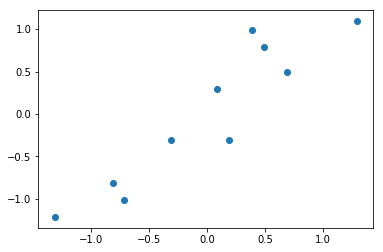

In [30]:
plt.scatter(x,y)

/Users/anandkumargupta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


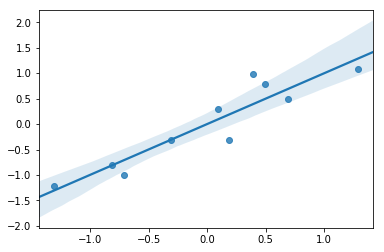

In [31]:
sn.regplot(x,y)

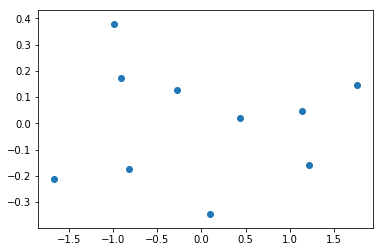

In [32]:
plt.scatter(Final_Data1,Final_Data2)

In [33]:
Final_Data1

array([[-0.82 ,  1.761, -0.984, -0.272, -1.66 , -0.905,  0.099,  1.134,
         0.434,  1.213]])

In [34]:
Final_Data2

array([[-0.1754,  0.1456,  0.3786,  0.1286, -0.2114,  0.1716, -0.3464,
         0.0486,  0.0186, -0.1584]])

In [35]:
Trans_dat1= [-0.82 ,  1.761, -0.984, -0.272, -1.66 , -0.905,  0.099,  1.134, 0.434,  1.213]

In [36]:
Trans_dat2=[-0.1754,  0.1456,  0.3786,  0.1286, -0.2114,  0.1716, -0.3464, 0.0486,  0.0186, -0.1584]

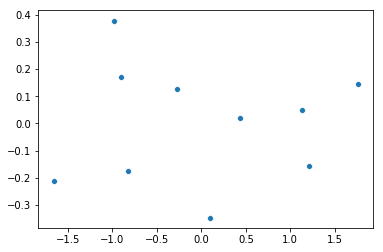

In [37]:
sn.scatterplot(Trans_dat1,Trans_dat2)

/Users/anandkumargupta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


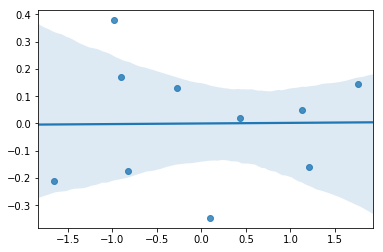

In [38]:
sn.regplot(Trans_dat1,Trans_dat2)

### Column sum of eigenvector

In [39]:
import math
math.sqrt((-.735*-.735)+(.677*.677))

0.9992767384463624

### PCA Model Building 

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_del)

PCA(copy=True, n_components=2, whiten=False)

df = pca.transform(df_del)

df_2d = pd.DataFrame(df)

df_2d.index = df_del.index

df_2d.columns = ['PC1', 'PC2']

df_2d.head(5)



,PC1,PC2
0,33.055249,-35.671449
1,-13.762445,6.138142
2,58.976048,-59.330959
3,4.351620,20.820122
4,89.453205,42.851607


### PCA Step by Step

In [41]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig


# define a matrix
A = array([[2.5, 2.4], [.5, .7], [2.2, 2.9],[1.9, 2.2],[3.1, 3.0],[2.3, 2.7],[2, 1.6],[1, 1.1],[1.5, 1.6],[1.1, 0.9]])

#A = array([[1, 2], [3, 4], [5, 6]])
print('Data:')
print(A)
print('\n')

# calculate the mean of each column
M = mean(A.T, axis=1)
print('Columnwise Mean:')
print(M)
print('\n')


# center columns by subtracting column means
C = A - M
print('Adjusted Data:')
print(C)
print('\n')


# calculate covariance matrix of centered matrix
V = cov(C.T)
print('Covariance Matrix:')
print(V)
print('\n')


# eigendecomposition of covariance matrix
values, vectors = eig(V)
print('Eigenvectors:')
print(vectors)
print('\n')

print('Eigenvalues:')
print(values)
print('\n')


# project data
P = vectors.T.dot(C.T)
print('Projected Data:')
print(P.T)
print('\n')


Data:
[[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]]


Columnwise Mean:
[1.81 1.91]


Adjusted Data:
[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]


Covariance Matrix:
[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


Eigenvectors:
[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


Eigenvalues:
[0.0490834  1.28402771]


Projected Data:
[[-0.17511531 -0.82797019]
 [ 0.14285723  1.77758033]
 [ 0.38437499 -0.99219749]
 [ 0.13041721 -0.27421042]
 [-0.20949846 -1.67580142]
 [ 0.17528244 -0.9129491 ]
 [-0.3498247   0.09910944]
 [ 0.04641726  1.14457216]
 [ 0.01776463  0.43804614]
 [-0.16267529  1.22382056]]




In [42]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA

# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
print('\n')

# create the PCA instance
pca = PCA(2)

# fit on data
pca.fit(A)
print('\n')

# access values and vectors
print(pca.components_)
print('\n')

print(pca.explained_variance_)
print('\n')

# transform data
B = pca.transform(A)
print(B)
print('\n')

[[1 2]
 [3 4]
 [5 6]]




[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


[8.00000000e+00 2.25080839e-33]


[[-2.82842712e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00 -2.22044605e-16]]


